In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA TITAN Xp


In [4]:
import sys
sys.path.append("../../..")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent
)

2022-11-29 09:09:49.780880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 09:09:51.381984: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:09:51.382128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:09:51.382144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [7]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [8]:
loader = KuHar_BalancedView20HzMotionSenseEquivalent(
    root_dir="../../../data/views/KuHar/balanced_20Hz_motionsense_equivalent-v1", 
    download=False
)

In [9]:
# Load the dataset
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=3114, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=246, features=360, no. window=6, label_columns='standard activity code')

In [10]:
train_HD = np.array(train_val[:][0])
train_LD = None
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_LD = None
test_Y = np.array(test[:][1])

In [11]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 360) (3114,) (246, 360) (246,)


# Aplicar FFT

In [12]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(
    transforms=[fft_transform],
    new_window_name_prefix="fft."
)

In [13]:
train_dataset_fft = transformer(train_val)
test_dataset_fft = transformer(test)

In [14]:
print(train_dataset_fft.X.shape)
print(test_dataset_fft.X.shape)

(3114, 180)
(246, 180)


In [15]:
print(np.max(train_dataset_fft.X))

1199.4899017510002


In [16]:
train_HD = train_dataset_fft.X
train_LD = None
train_Y = train_dataset_fft.y
test_HD = test_dataset_fft.X
test_LD = None
test_Y = test_dataset_fft.y

In [17]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 180) (3114,) (246, 180) (246,)


Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:561.1151, Loss-ae:561.1151, Loss-topo:144.0504
Epoch:2, P:None, Loss:357.9538, Loss-ae:357.9538, Loss-topo:162.2495
Epoch:3, P:None, Loss:275.4609, Loss-ae:275.4609, Loss-topo:411.5800
Epoch:4, P:None, Loss:244.5914, Loss-ae:244.5914, Loss-topo:520.7482
Epoch:5, P:None, Loss:219.0709, Loss-ae:219.0709, Loss-topo:727.8769
Epoch:6, P:None, Loss:192.3876, Loss-ae:192.3876, Loss-topo:1144.3710
Epoch:7, P:None, Loss:174.9689, Loss-ae:174.9689, Loss-topo:1602.2157
Epoch:8, P:None, Loss:159.5269, Loss-ae:159.5269, Loss-topo:2113.8947
Epoch:9, P:None, Loss:149.9788, Loss-ae:149.9788, Loss-topo:2486.7269
Epoch:10, P:None, Loss:142.7818, Loss-ae:142.7818, Loss-topo:3219.3010
Epoch:11, P:None, Loss:132.1329, Loss-ae:132.1329, Loss-topo:3668.6843
Epoch:12, P:None, Loss:123.1047, Loss-ae:123.1047, Loss-topo:4521.2888
Epoch:13, P:None, Loss:117.4416, Loss-ae:117.4416, Loss-topo:5035.8804
Epoch:14, P:None, Loss:110.1896, Loss-ae:110.1896, Loss-topo:6019.7193
Epoch:15, P:None, Lo

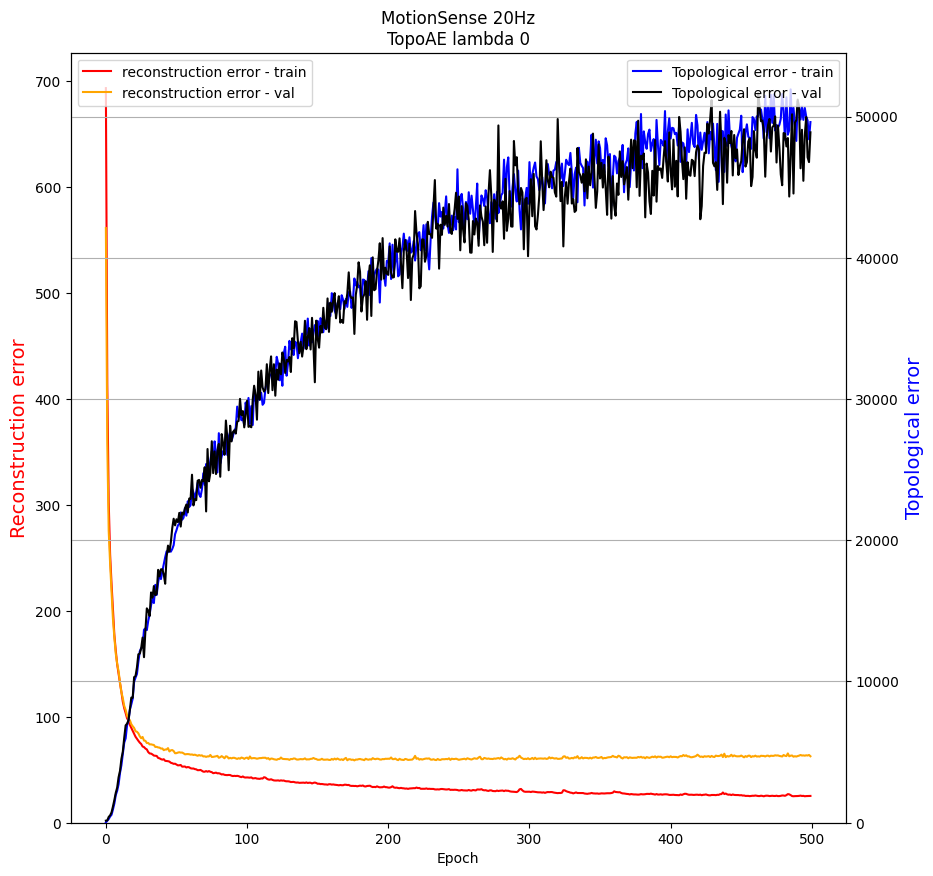

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:594.3494, Loss-ae:567.9226, Loss-topo:264.2675
Epoch:2, P:None, Loss:472.8601, Loss-ae:461.1074, Loss-topo:117.5265
Epoch:3, P:None, Loss:419.5041, Loss-ae:410.3507, Loss-topo:91.5339
Epoch:4, P:None, Loss:383.1904, Loss-ae:374.8731, Loss-topo:83.1723
Epoch:5, P:None, Loss:350.6000, Loss-ae:341.4891, Loss-topo:91.1087
Epoch:6, P:None, Loss:305.7907, Loss-ae:290.5039, Loss-topo:152.8675
Epoch:7, P:None, Loss:284.8992, Loss-ae:274.0260, Loss-topo:108.7318
Epoch:8, P:None, Loss:270.0323, Loss-ae:260.5054, Loss-topo:95.2698
Epoch:9, P:None, Loss:263.3574, Loss-ae:253.0406, Loss-topo:103.1677
Epoch:10, P:None, Loss:254.6954, Loss-ae:245.7989, Loss-topo:88.9653
Epoch:11, P:None, Loss:246.5946, Loss-ae:237.4741, Loss-topo:91.2055
Epoch:12, P:None, Loss:239.4388, Loss-ae:230.8084, Loss-topo:86.3047
Epoch:13, P:None, Loss:234.0602, Loss-ae:226.4363, Loss-topo:76.2391
Epoch:14, P:None, Loss:227.1667, Loss-ae:220.4435, Loss-topo:67.2317
Epoch:15, P:None, Loss:225.6627, Loss-

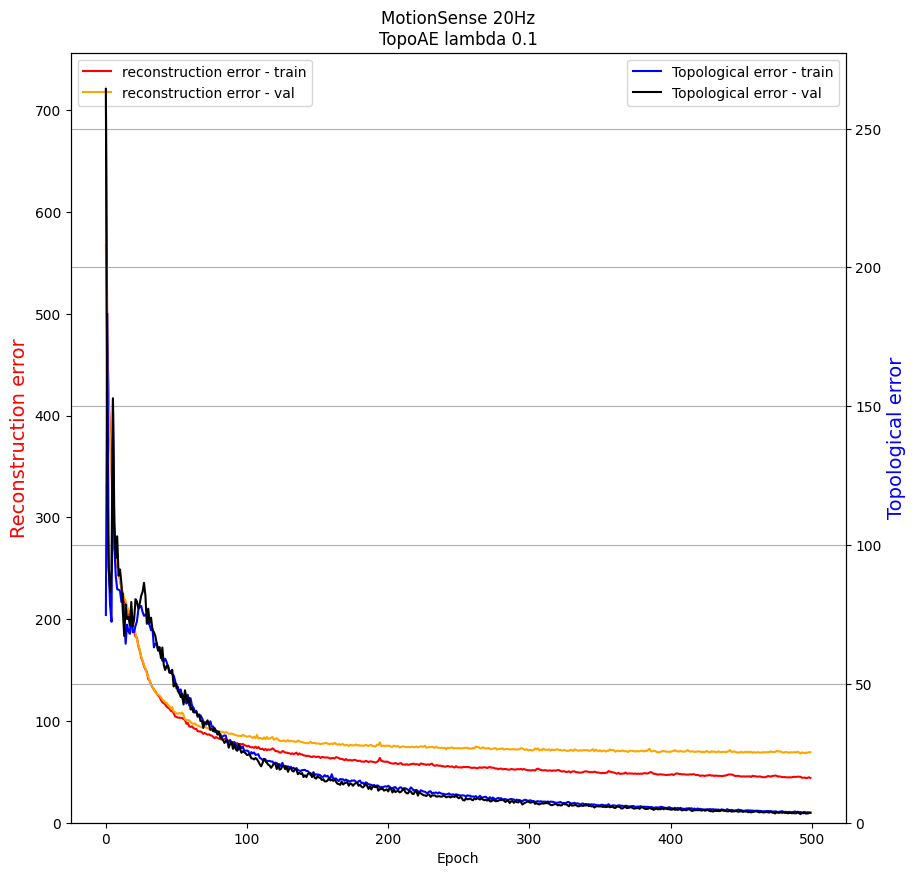

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:400.8161, Loss-ae:399.1646, Loss-topo:165.1534
Epoch:2, P:None, Loss:347.5016, Loss-ae:344.7191, Loss-topo:278.2487
Epoch:3, P:None, Loss:285.7656, Loss-ae:279.5802, Loss-topo:618.5328
Epoch:4, P:None, Loss:255.2306, Loss-ae:247.3620, Loss-topo:786.8619
Epoch:5, P:None, Loss:225.9753, Loss-ae:217.6222, Loss-topo:835.3143
Epoch:6, P:None, Loss:208.6276, Loss-ae:198.7035, Loss-topo:992.4055
Epoch:7, P:None, Loss:195.1169, Loss-ae:183.6257, Loss-topo:1149.1203
Epoch:8, P:None, Loss:180.6016, Loss-ae:170.8918, Loss-topo:970.9862
Epoch:9, P:None, Loss:166.1914, Loss-ae:156.3727, Loss-topo:981.8705
Epoch:10, P:None, Loss:154.3327, Loss-ae:144.2149, Loss-topo:1011.7831
Epoch:11, P:None, Loss:144.3516, Loss-ae:134.1548, Loss-topo:1019.6770
Epoch:12, P:None, Loss:137.7598, Loss-ae:128.6666, Loss-topo:909.3141
Epoch:13, P:None, Loss:128.1471, Loss-ae:119.7975, Loss-topo:834.9606
Epoch:14, P:None, Loss:125.1437, Loss-ae:116.5968, Loss-topo:854.6961
Epoch:15, P:None, Loss:118

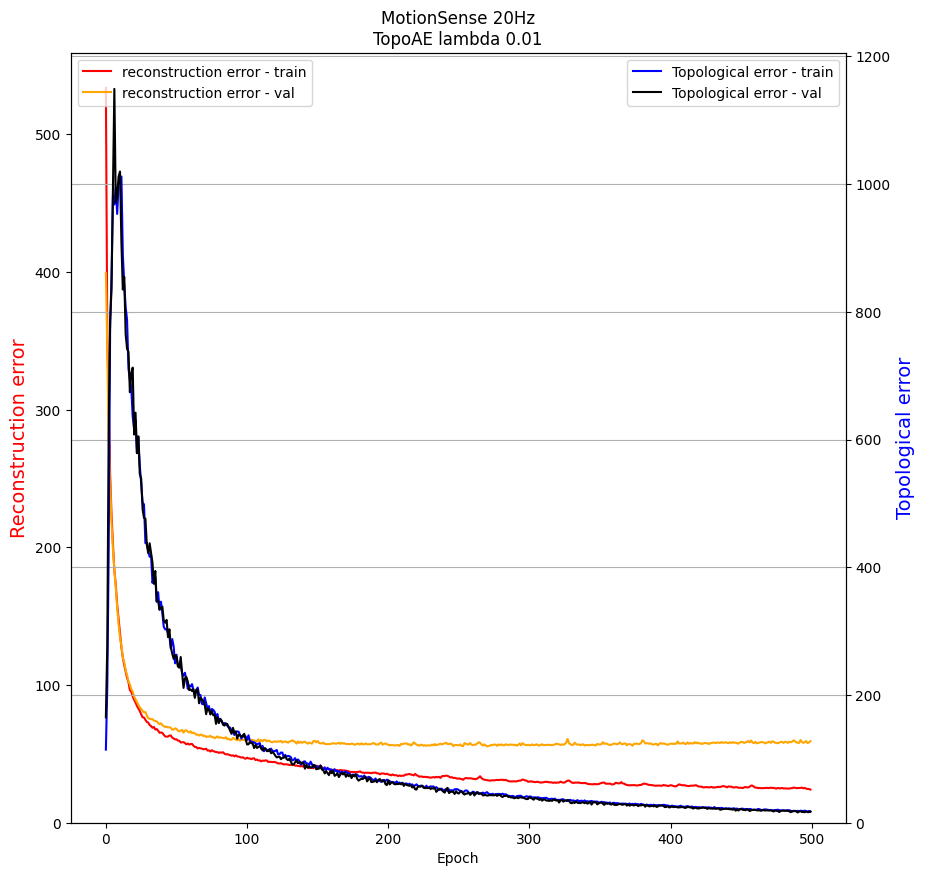

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:803.7249, Loss-ae:803.3411, Loss-topo:0.3838
Epoch:2, P:None, Loss:499.2908, Loss-ae:452.3187, Loss-topo:46.9721
Epoch:3, P:None, Loss:418.4863, Loss-ae:407.1036, Loss-topo:11.3827
Epoch:4, P:None, Loss:389.0840, Loss-ae:377.3020, Loss-topo:11.7820
Epoch:5, P:None, Loss:381.3708, Loss-ae:371.1704, Loss-topo:10.2003
Epoch:6, P:None, Loss:376.3392, Loss-ae:367.6906, Loss-topo:8.6486
Epoch:7, P:None, Loss:373.1974, Loss-ae:367.7834, Loss-topo:5.4140
Epoch:8, P:None, Loss:365.3844, Loss-ae:358.3443, Loss-topo:7.0401
Epoch:9, P:None, Loss:351.4784, Loss-ae:342.0616, Loss-topo:9.4168
Epoch:10, P:None, Loss:316.3307, Loss-ae:300.7158, Loss-topo:15.6149
Epoch:11, P:None, Loss:295.3865, Loss-ae:283.0774, Loss-topo:12.3091
Epoch:12, P:None, Loss:282.8627, Loss-ae:273.2862, Loss-topo:9.5765
Epoch:13, P:None, Loss:274.6636, Loss-ae:264.9812, Loss-topo:9.6824
Epoch:14, P:None, Loss:263.1994, Loss-ae:253.3490, Loss-topo:9.8505
Epoch:15, P:None, Loss:257.8639, Loss-ae:249.3658, 

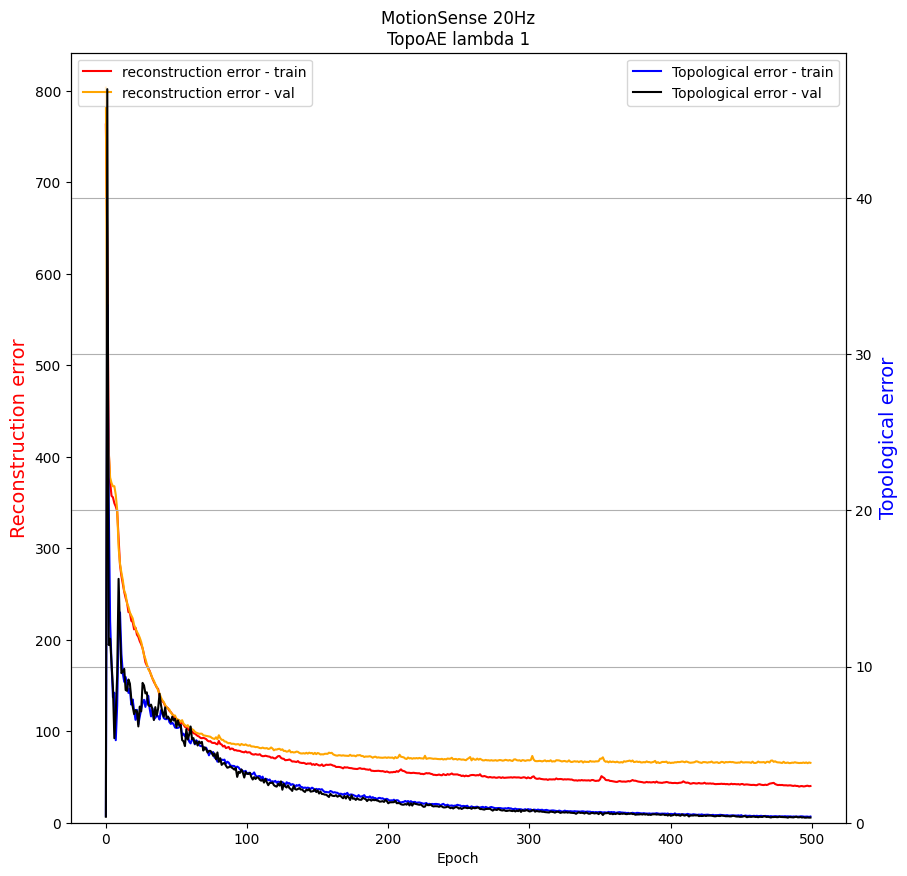

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:526.7458, Loss-ae:484.7316, Loss-topo:4.2014
Epoch:2, P:None, Loss:465.0366, Loss-ae:449.4318, Loss-topo:1.5605
Epoch:3, P:None, Loss:433.0417, Loss-ae:419.5567, Loss-topo:1.3485
Epoch:4, P:None, Loss:403.4416, Loss-ae:392.1264, Loss-topo:1.1315
Epoch:5, P:None, Loss:381.8205, Loss-ae:371.2097, Loss-topo:1.0611
Epoch:6, P:None, Loss:369.2238, Loss-ae:358.6940, Loss-topo:1.0530
Epoch:7, P:None, Loss:352.2104, Loss-ae:340.7302, Loss-topo:1.1480
Epoch:8, P:None, Loss:326.5607, Loss-ae:308.8492, Loss-topo:1.7711
Epoch:9, P:None, Loss:305.6803, Loss-ae:286.6132, Loss-topo:1.9067
Epoch:10, P:None, Loss:291.0580, Loss-ae:275.2404, Loss-topo:1.5818
Epoch:11, P:None, Loss:280.8283, Loss-ae:266.7963, Loss-topo:1.4032
Epoch:12, P:None, Loss:265.2527, Loss-ae:253.0630, Loss-topo:1.2190
Epoch:13, P:None, Loss:255.2440, Loss-ae:244.8310, Loss-topo:1.0413
Epoch:14, P:None, Loss:248.7395, Loss-ae:237.3794, Loss-topo:1.1360
Epoch:15, P:None, Loss:235.8598, Loss-ae:225.0620, Loss-t

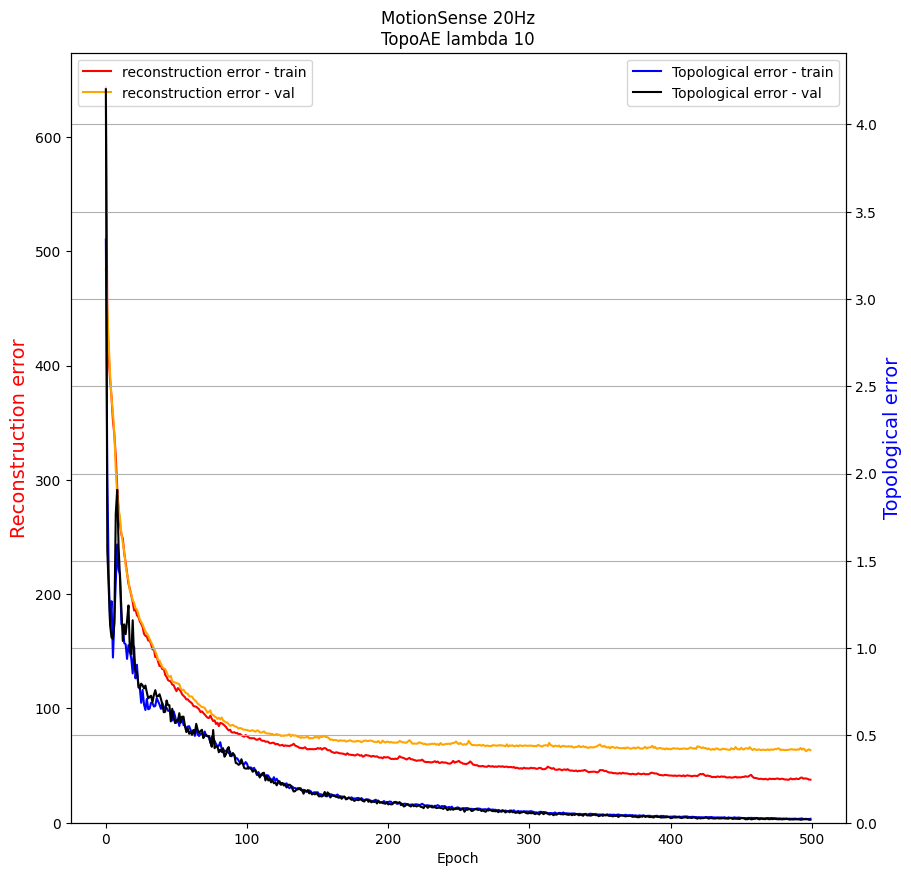

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:803.0598, Loss-ae:801.3155, Loss-topo:0.0174
Epoch:2, P:None, Loss:750.2789, Loss-ae:748.6967, Loss-topo:0.0158
Epoch:3, P:None, Loss:501.3378, Loss-ae:494.7387, Loss-topo:0.0660
Epoch:4, P:None, Loss:445.1498, Loss-ae:433.8566, Loss-topo:0.1129
Epoch:5, P:None, Loss:411.4614, Loss-ae:400.1698, Loss-topo:0.1129
Epoch:6, P:None, Loss:390.4676, Loss-ae:378.5223, Loss-topo:0.1195
Epoch:7, P:None, Loss:377.2794, Loss-ae:369.2500, Loss-topo:0.0803
Epoch:8, P:None, Loss:364.8750, Loss-ae:357.8363, Loss-topo:0.0704
Epoch:9, P:None, Loss:358.5100, Loss-ae:351.1926, Loss-topo:0.0732
Epoch:10, P:None, Loss:352.4575, Loss-ae:343.3918, Loss-topo:0.0907
Epoch:11, P:None, Loss:338.6958, Loss-ae:332.4682, Loss-topo:0.0623
Epoch:12, P:None, Loss:335.3856, Loss-ae:329.4093, Loss-topo:0.0598
Epoch:13, P:None, Loss:323.4276, Loss-ae:318.7473, Loss-topo:0.0468
Epoch:14, P:None, Loss:315.3990, Loss-ae:306.6204, Loss-topo:0.0878
Epoch:15, P:None, Loss:292.1926, Loss-ae:280.5048, Loss-t

KeyboardInterrupt: 

In [18]:
import pickle

# Variables to reuse
save_id = 3
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100, 1000]

for model_lam in model_lams:
    # Training model
    topo_reducer = CustomTopoDimRedTransform(
        model_name=model_name,
        model_lambda=model_lam,
        patience=None,
        num_epochs=model_epc,
        from_dim=180,
        to_dim=model_dim
    )

    title_plot = "MotionSense 20Hz\nTopoAE lambda {}".format(model_lam)
    topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

    # Variables to reuse
    filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)

    filehandler = open(filename, 'wb')
    pickle.dump(topo_reducer, filehandler)
    filehandler.close()